## 激勵函數

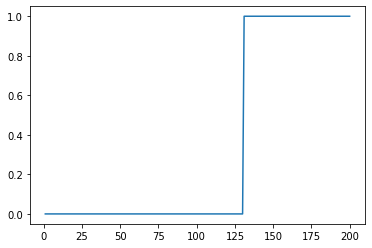

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = np.arange(1, 201)
y = []
for i in range(len(x)):
    if x[i] > 130:
        y.append(1)
    else:
        y.append(0)
plt.plot(x, y)
plt.show()

### 激勵函數-Sigmoid

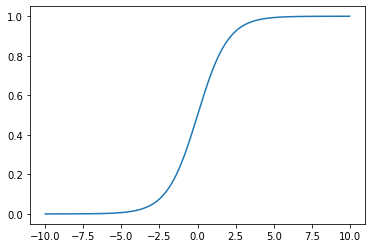

In [19]:
x = torch.arange(-10., 10., step=0.01)
plt.plot(x, torch.sigmoid(x))
plt.show()

### 未經訓練model

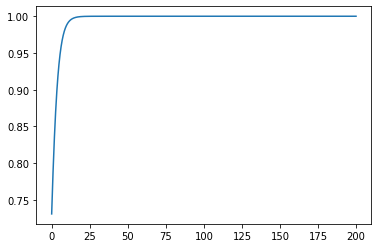

In [20]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
def forward(t):
    return torch.sigmoid( a * t + b )
# 溫度範圍 0 ~ 200 度
x = torch.arange(0, 200, step=0.1)
# y_p 是 y predict, 我們預測的 y
y_p = forward(x).detach().numpy()  # .detach().numpy() 是轉換成 numpy
# 繪圖
plt.plot(x, y_p)

### 激勵函數與線性迴歸組合

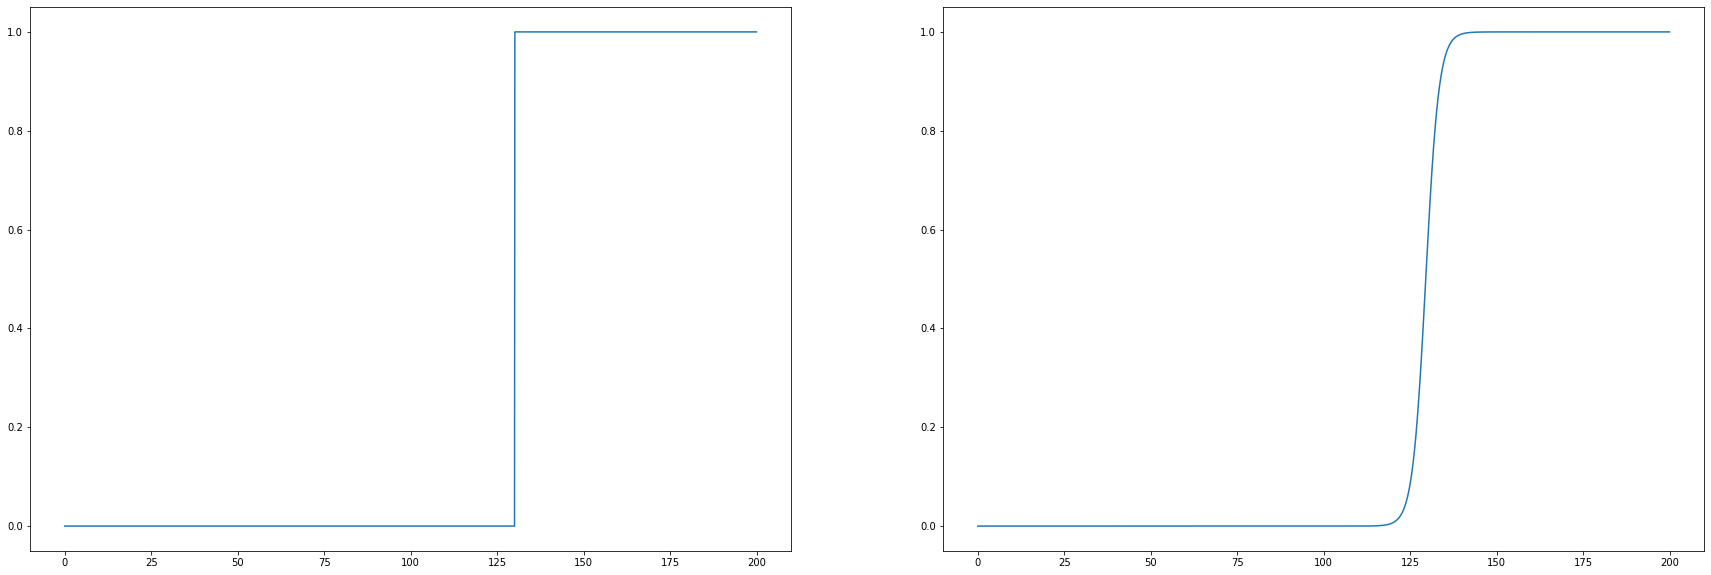

In [21]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 溫度範圍
x = torch.arange(0, 200, step=0.1)

# 我們先做出正確答案
def check(t):
    if t > 130:
        return 1
    return 0
y = torch.tensor([check(t) for t in x]).float()
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(x, y)

# 準備變數
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

# 定義計算
def forward(t):
    # y = sigmoid(ax + b)
    return torch.sigmoid(a * t + b)

# 優化器
opt = torch.optim.Adam([a, b], lr=0.05)

# 損失函數
loss_func = torch.nn.BCELoss()

# 開始訓練
for _ in range(10000):
    y_p = forward(x)          # 預測 y
    loss = loss_func(y_p, y)  # 計算誤差
    opt.zero_grad()  # 導數重置
    loss.backward()  # 反向傳導
    opt.step()       # 優化器修正
    
plt.subplot(1, 2, 2)
y_p = forward(x).detach().numpy()
plt.plot(x, y_p)

## 激勵函數之 Sigmoid / ReLU / Tanh / Softmax 比較

### Sigmoid

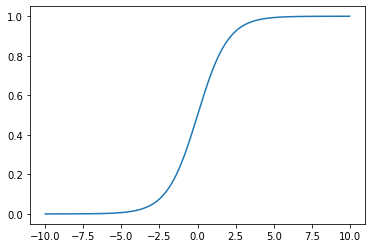

In [22]:
x = torch.arange(-10, 10, step=0.01)
plt.plot(x, torch.sigmoid(x))
plt.show()

### Relu

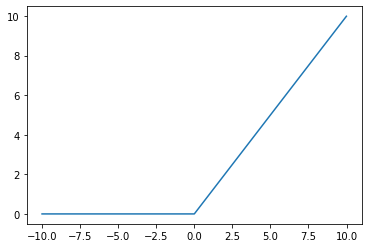

In [23]:
x = torch.arange(-10, 10, step=0.01)
plt.plot(x, torch.relu(x))
plt.show()

### Tanh

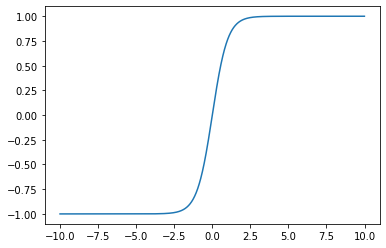

In [26]:
x = torch.arange(-10, 10, step=0.01)
plt.plot(x, torch.tanh(x))
plt.show()

### Softmax

總和: tensor(1.)


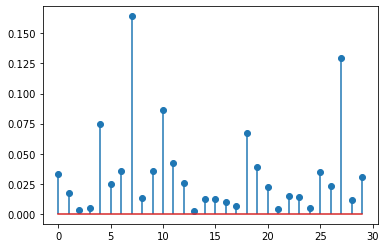

In [30]:
x = torch.randn(30)
plt.stem(torch.softmax(x, dim=0))
print('總和:', torch.sum(torch.softmax(x, dim=0)))